<a href="https://colab.research.google.com/github/wulanika/TugasUasMachineLearning/blob/main/NexusVaguard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#IMPORTING LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Ulta Skincare Reviews.csv')
df.dropna()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,Much better product than a scrub.,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23
4146,Gentle exfoliant- leaves skin smooth & soft,I've been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23
4147,One of my favorite skincare products of all time.,My skin looks better now than 10 years ago.,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23
4148,Ehhh...,This product was useless for me. I should've k...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23


In [ ]:
df.tail()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
4145,I would buy this product again,"[much, better, product, than, a, scrub]",Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23
4146,Gentle exfoliant- leaves skin smooth & soft,"[i, ve, been, using, this, exfoliant, for, a, ...",No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23
4147,One of my favorite skincare products of all time.,"[my, skin, looks, better, now, than, 10, years...",Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23
4148,Ehhh...,"[this, product, was, useless, for, me, i, shou...",Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23
4149,This is the best!!!,"[this, product, is, amazing, it, is, the, only...",Yes,7 years ago,Mississippi,1,1,Daily Microfoliant,Dermalogica,3/27/23


In [ ]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x))
df['Review_Text'] = df['Review_Text'].apply(lambda x: word_tokenize(x))
df['Review_Text']

0       [love, using, this, on, my, face, while, in, t...
1       [even, better, than, the, daily, microfoliant,...
2       [enjoy, this, product, so, much, i, look, forw...
3       [i, ve, never, tried, anything, like, this, be...
4       [this, exfoliates, very, nicely, and, gives, a...
                              ...                        
4145              [much, better, product, than, a, scrub]
4146    [i, ve, been, using, this, exfoliant, for, a, ...
4147    [my, skin, looks, better, now, than, 10, years...
4148    [this, product, was, useless, for, me, i, shou...
4149    [this, product, is, amazing, it, is, the, only...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df['Review_Text']

0       [love, using, face, shower, heats, gives, ligh...
1       [even, better, daily, microfoliant, obsessed, ...
2       [enjoy, product, much, look, forward, using, r...
3       [never, tried, anything, like, love, apply, fa...
4       [exfoliates, nicely, gives, smooth, skin, irri...
                              ...                        
4145                       [much, better, product, scrub]
4146    [using, exfoliant, months, depending, conditio...
4147                [skin, looks, better, 10, years, ago]
4148    [product, useless, known, exfoliant, use, dail...
4149    [product, amazing, thing, helps, dry, patches,...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
ps=PorterStemmer()
df['Review_Text'] = df['Review_Text'].apply(lambda x: [ps.stem(y) for y in x])
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join(x))
df['Review_Text']

0         love use face shower heat give light scrub nice
1       even better daili microfoli obsess skin much s...
2       enjoy product much look forward use realli fee...
3       never tri anyth like love appli face get littl...
4       exfoli nice give smooth skin irrit reaction sk...
                              ...                        
4145                            much better product scrub
4146    use exfoli month depend condit skin use anywhe...
4147                         skin look better 10 year ago
4148    product useless known exfoli use daili would g...
4149    product amaz thing help dri patch cheek also c...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['score']=df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.7906
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.2263
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.8074
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.7839
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.6486
...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404
4146,Gentle exfoliant- leaves skin smooth & soft,use exfoli month depend condit skin use anywhe...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,0.5100
4147,One of my favorite skincare products of all time.,skin look better 10 year ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404
4148,Ehhh...,product useless known exfoli use daili would g...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,0.1027


In [ ]:
df['sentiment'] = df['score'].apply(lambda x: 1 if x>0 else 0)
df

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,sentiment
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.7906,1
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.2263,1
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.8074,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.7839,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.6486,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404,1
4146,Gentle exfoliant- leaves skin smooth & soft,use exfoli month depend condit skin use anywhe...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,0.5100,1
4147,One of my favorite skincare products of all time.,skin look better 10 year ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,0.4404,1
4148,Ehhh...,product useless known exfoli use daili would g...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,0.1027,1


In [ ]:
df['sentiment'].value_counts()

sentiment
1    3506
0     644
Name: count, dtype: int64

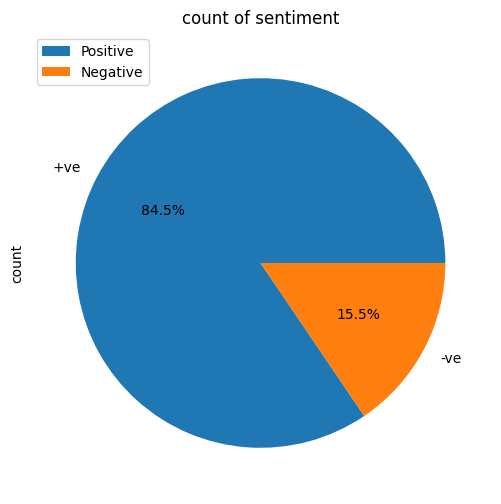

In [ ]:
df['sentiment'].value_counts().plot.pie(figsize=(6,6) , title='count of sentiment' ,labels=['+ve','-ve'],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=2)

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(df['Review_Text'])

In [ ]:
X=x.toarray()
y=df['sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score is ',accuracy)

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy score is  0.8618473895582329
              precision    recall  f1-score   support

           0       0.75      0.20      0.32       199
           1       0.87      0.99      0.92      1046

    accuracy                           0.86      1245
   macro avg       0.81      0.59      0.62      1245
weighted avg       0.85      0.86      0.83      1245



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  40  159]
 [  13 1033]]


[[  40  159]
 [  13 1033]]


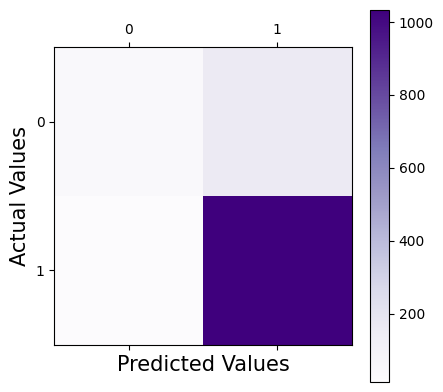

In [ ]:
plt.matshow(cm,cmap=plt.cm.Purples)
plt.colorbar()
plt.ylabel('Actual Values',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
print(cm)